# YOLO11 Training and Ablation Notebook (Clean Import)
Upload your yolo11.yaml -> generate n/s/m/l/x configs -> run training -> run ablation.

### Prepare YOLO11 files for Upload and Training

In [1]:

import tkinter as tk
from tkinter import filedialog
import os

def upload_yaml_file():
    """Open file dialog and return selected YAML file path"""
    print("Upload your yolo11.yaml file...")
    
    # Create hidden tkinter root window
    root = tk.Tk()
    root.withdraw()
    root.attributes('-topmost', True)  # Bring dialog to front
    
    # Open file dialog
    BASE_YAML = filedialog.askopenfilename(
        title="Upload your yolo11.yaml file",
        filetypes=[
            ("YAML files", "*.yaml *.yml"),
            ("All files", "*.*")
        ],
        initialdir=os.getcwd()
    )
    
    root.destroy()
    
    # Display result
    if BASE_YAML and os.path.exists(BASE_YAML):
        filename = os.path.basename(BASE_YAML)
        print(f"Uploaded: {filename}")
        return BASE_YAML
    else:
        print("No file chosen")
        return None

# Usage
BASE_YAML = upload_yaml_file()

if BASE_YAML:
    print(f"File path: {BASE_YAML}")
else:
    print("Upload cancelled or file not found.")


Upload your yolo11.yaml file...
Uploaded: yolo11_nocsp1.yaml
File path: C:/Users/Cloud Playground/OneDrive - Sam Houston State University/Documents/SHSU/Fall 2025/Semina/Yolo11_Demonstartion of Configuration Experiemnt/yolo11_nocsp1.yaml


In [2]:
import yaml, copy
import os
import tkinter as tk
from tkinter import filedialog

scale_settings = {
    "n":[0.50,0.25,1024],
    "s":[0.50,0.50,1024],
    "m":[0.50,1.00,512],
    "l":[1.00,1.00,512],
    "x":[1.00,1.50,512],
}

with open(BASE_YAML,"r") as f:
    base_cfg=yaml.safe_load(f)

if "scales" in base_cfg:
    del base_cfg["scales"]

# Let user select output directory
root = tk.Tk()
root.withdraw()
root.attributes('-topmost', True)

print("Select output directory for generated YAML files...")
output_dir = filedialog.askdirectory(
    title="Select Output Directory",
    initialdir=os.path.dirname(BASE_YAML) or os.getcwd()
)
root.destroy()

if not output_dir:
    print("No directory selected. Using current directory.")
    output_dir = os.getcwd()

generated=[]
for name,(d,w,mxc) in scale_settings.items():
    cfg=copy.deepcopy(base_cfg)
    cfg["depth_multiple"]=d
    cfg["width_multiple"]=w
    cfg["max_channels"]=mxc
    out = os.path.join(output_dir, f"yolo11{name}.yaml")
    with open(out,"w") as f: yaml.dump(cfg,f)
    generated.append(out)
    print("Generated:", out)

generated


Select output directory for generated YAML files...
Generated: C:/Users/Cloud Playground/OneDrive - Sam Houston State University/Documents/SHSU/Fall 2025/Semina/Yolo11_Demonstartion of Configuration Experiemnt/New_Variants\yolo11n.yaml
Generated: C:/Users/Cloud Playground/OneDrive - Sam Houston State University/Documents/SHSU/Fall 2025/Semina/Yolo11_Demonstartion of Configuration Experiemnt/New_Variants\yolo11s.yaml
Generated: C:/Users/Cloud Playground/OneDrive - Sam Houston State University/Documents/SHSU/Fall 2025/Semina/Yolo11_Demonstartion of Configuration Experiemnt/New_Variants\yolo11m.yaml
Generated: C:/Users/Cloud Playground/OneDrive - Sam Houston State University/Documents/SHSU/Fall 2025/Semina/Yolo11_Demonstartion of Configuration Experiemnt/New_Variants\yolo11l.yaml
Generated: C:/Users/Cloud Playground/OneDrive - Sam Houston State University/Documents/SHSU/Fall 2025/Semina/Yolo11_Demonstartion of Configuration Experiemnt/New_Variants\yolo11x.yaml


['C:/Users/Cloud Playground/OneDrive - Sam Houston State University/Documents/SHSU/Fall 2025/Semina/Yolo11_Demonstartion of Configuration Experiemnt/New_Variants\\yolo11n.yaml',
 'C:/Users/Cloud Playground/OneDrive - Sam Houston State University/Documents/SHSU/Fall 2025/Semina/Yolo11_Demonstartion of Configuration Experiemnt/New_Variants\\yolo11s.yaml',
 'C:/Users/Cloud Playground/OneDrive - Sam Houston State University/Documents/SHSU/Fall 2025/Semina/Yolo11_Demonstartion of Configuration Experiemnt/New_Variants\\yolo11m.yaml',
 'C:/Users/Cloud Playground/OneDrive - Sam Houston State University/Documents/SHSU/Fall 2025/Semina/Yolo11_Demonstartion of Configuration Experiemnt/New_Variants\\yolo11l.yaml',
 'C:/Users/Cloud Playground/OneDrive - Sam Houston State University/Documents/SHSU/Fall 2025/Semina/Yolo11_Demonstartion of Configuration Experiemnt/New_Variants\\yolo11x.yaml']

In [3]:
#%pip install roboflow
#%pip install ultralytics

In [4]:
from ultralytics import YOLO
import os, torch, pandas as pd
from IPython.display import Image, display

Step 1: Select your data.yaml file...
✓ Selected: C:/Users/Cloud Playground/OneDrive - Sam Houston State University/Documents/SHSU/Fall 2025/Semina/Yolo11_Demonstartion of Configuration Experiemnt/datasets/data.yaml

Step 2: Select which model variants to use...
✓ Selected variants: ['n', 's', 'm']

Step 3: Select the YAML file location for each variant...

Select YOLO11n.yaml file location...
✓ n: C:/Users/Cloud Playground/OneDrive - Sam Houston State University/Documents/SHSU/Fall 2025/Semina/Yolo11_Demonstartion of Configuration Experiemnt/New_Variants/yolo11n.yaml

Select YOLO11s.yaml file location...
✓ s: C:/Users/Cloud Playground/OneDrive - Sam Houston State University/Documents/SHSU/Fall 2025/Semina/Yolo11_Demonstartion of Configuration Experiemnt/New_Variants/yolo11s.yaml

Select YOLO11m.yaml file location...
✓ m: C:/Users/Cloud Playground/OneDrive - Sam Houston State University/Documents/SHSU/Fall 2025/Semina/Yolo11_Demonstartion of Configuration Experiemnt/New_Variants/yolo11

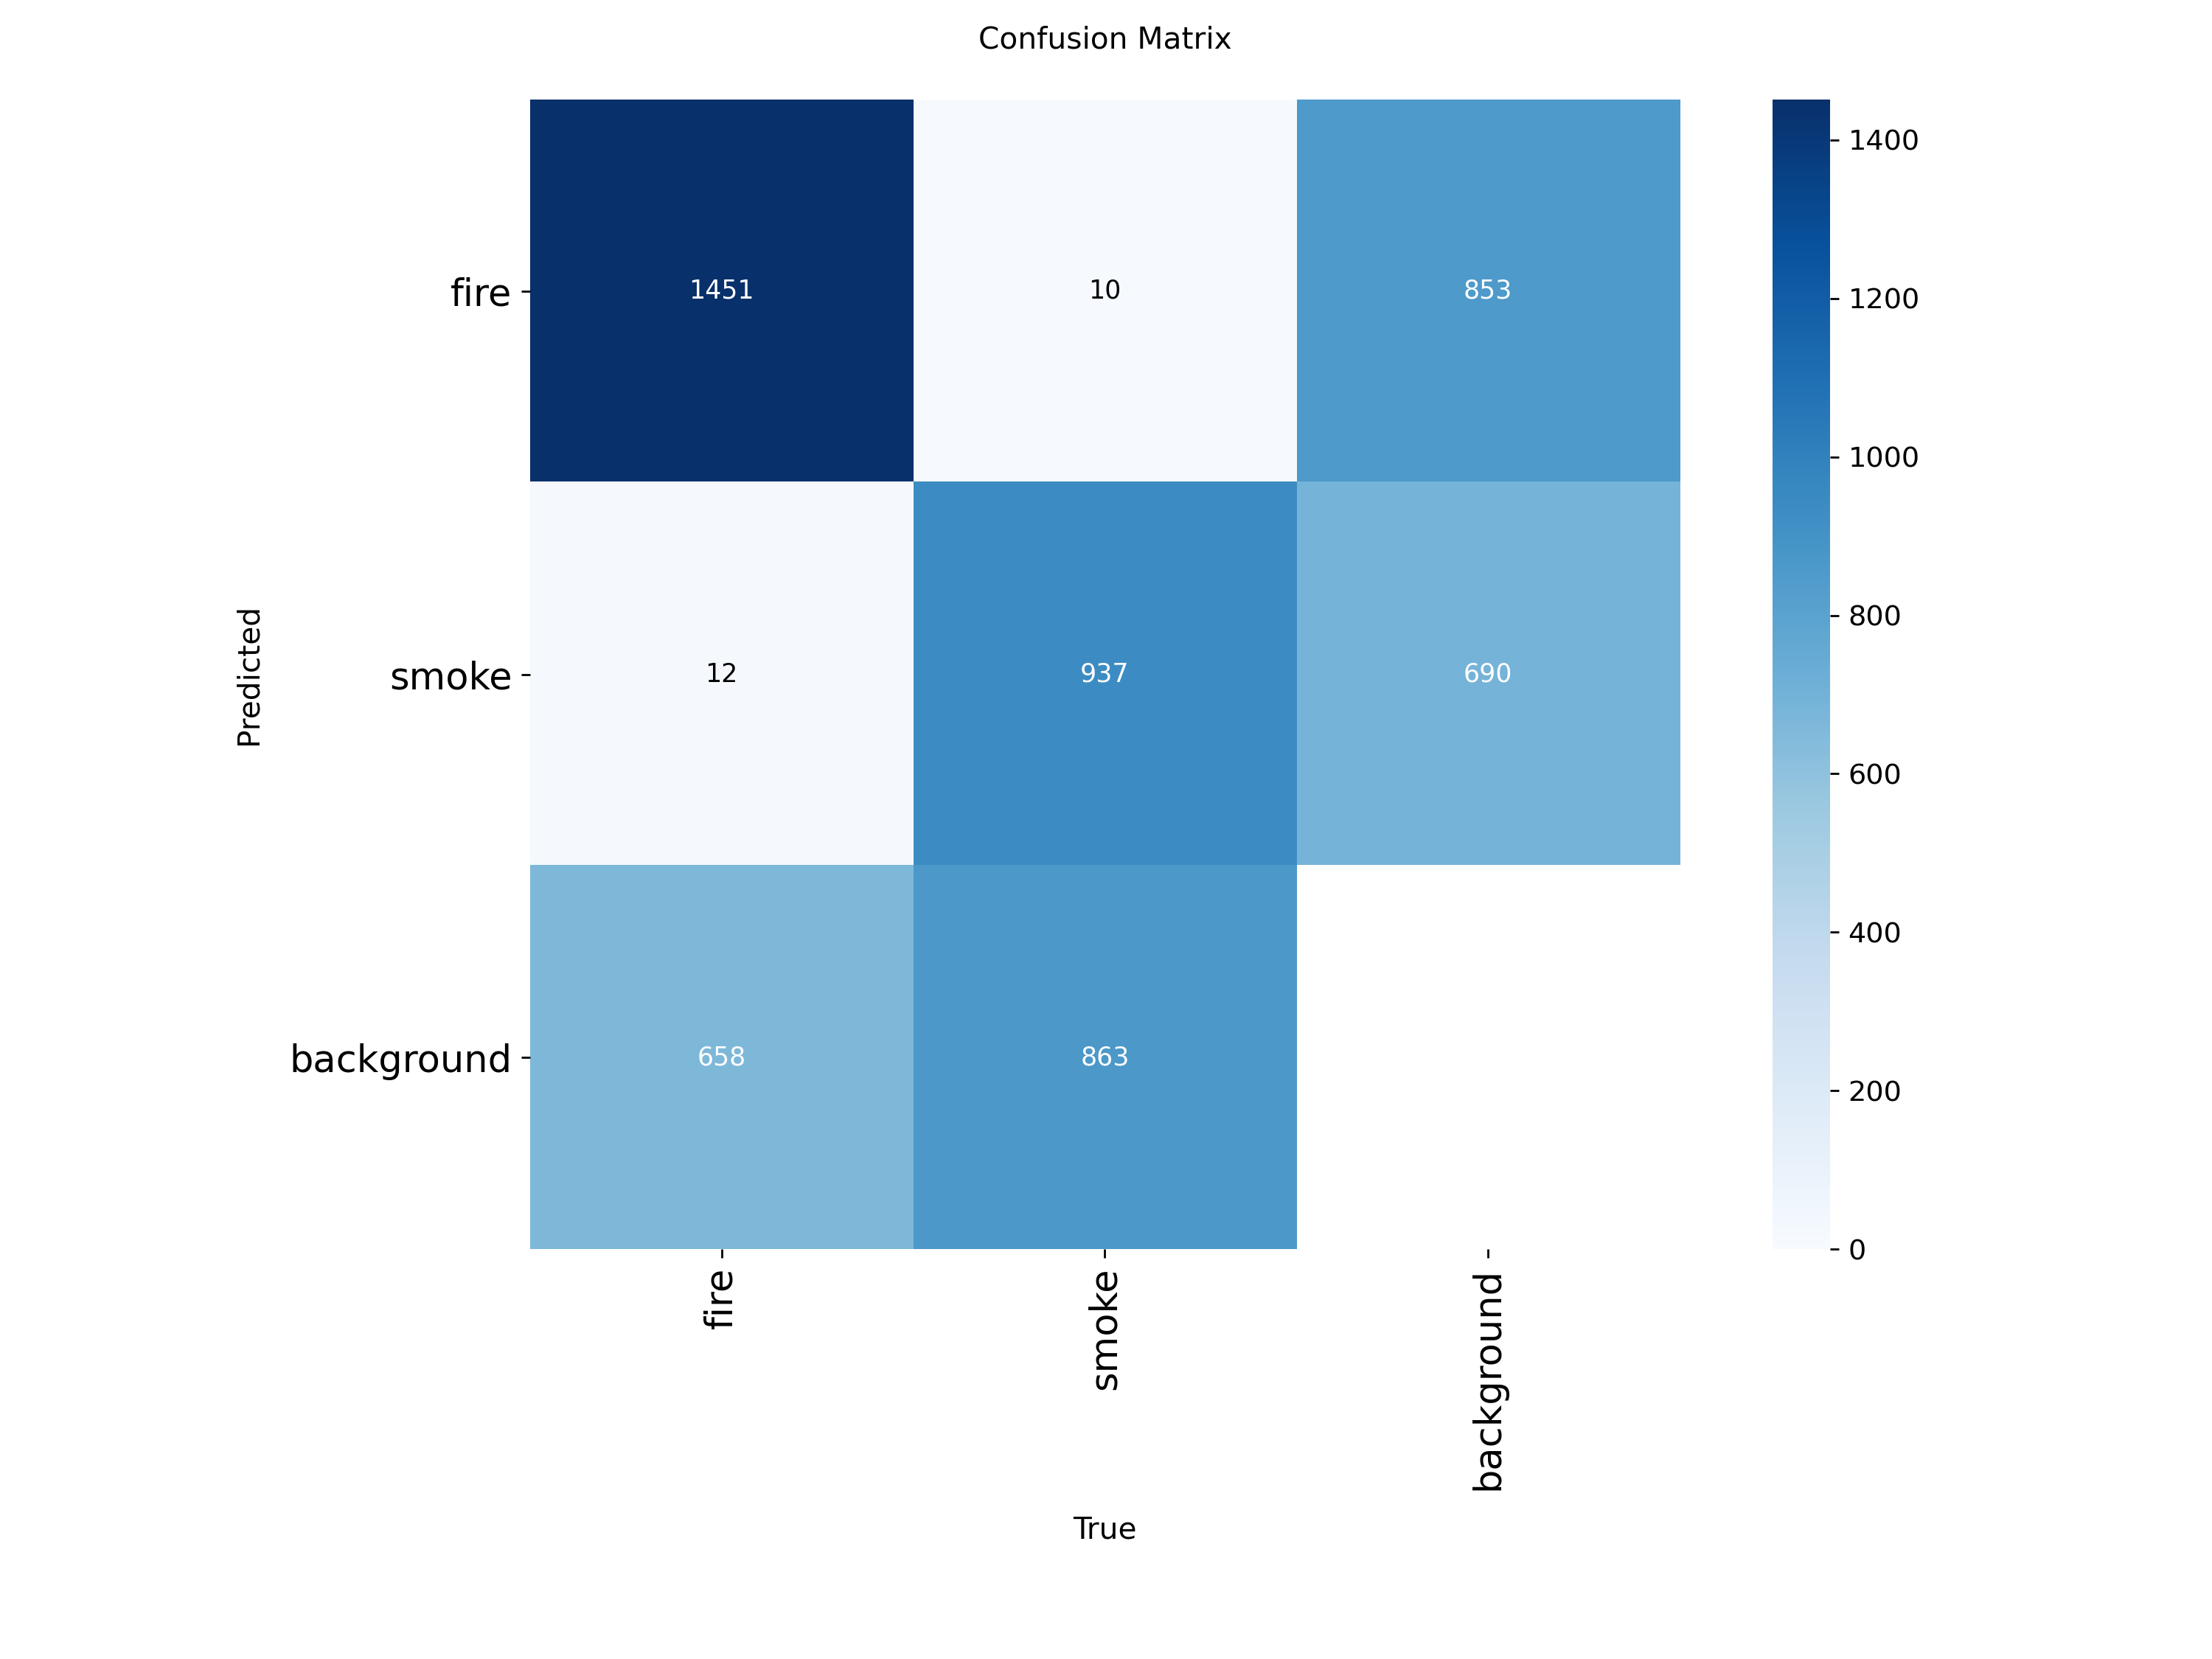


🚀 Training model: C:/Users/Cloud Playground/OneDrive - Sam Houston State University/Documents/SHSU/Fall 2025/Semina/Yolo11_Demonstartion of Configuration Experiemnt/New_Variants/yolo11s.yaml
New https://pypi.org/project/ultralytics/8.3.230 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.229  Python-3.11.0 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 5070, 12227MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:/Users/Cloud Playground/OneDrive - Sam Houston State University/Documents/SHSU/Fall 2025/Semina/Yolo11_Demonstartion of Configuration Experiemnt/datasets/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, form

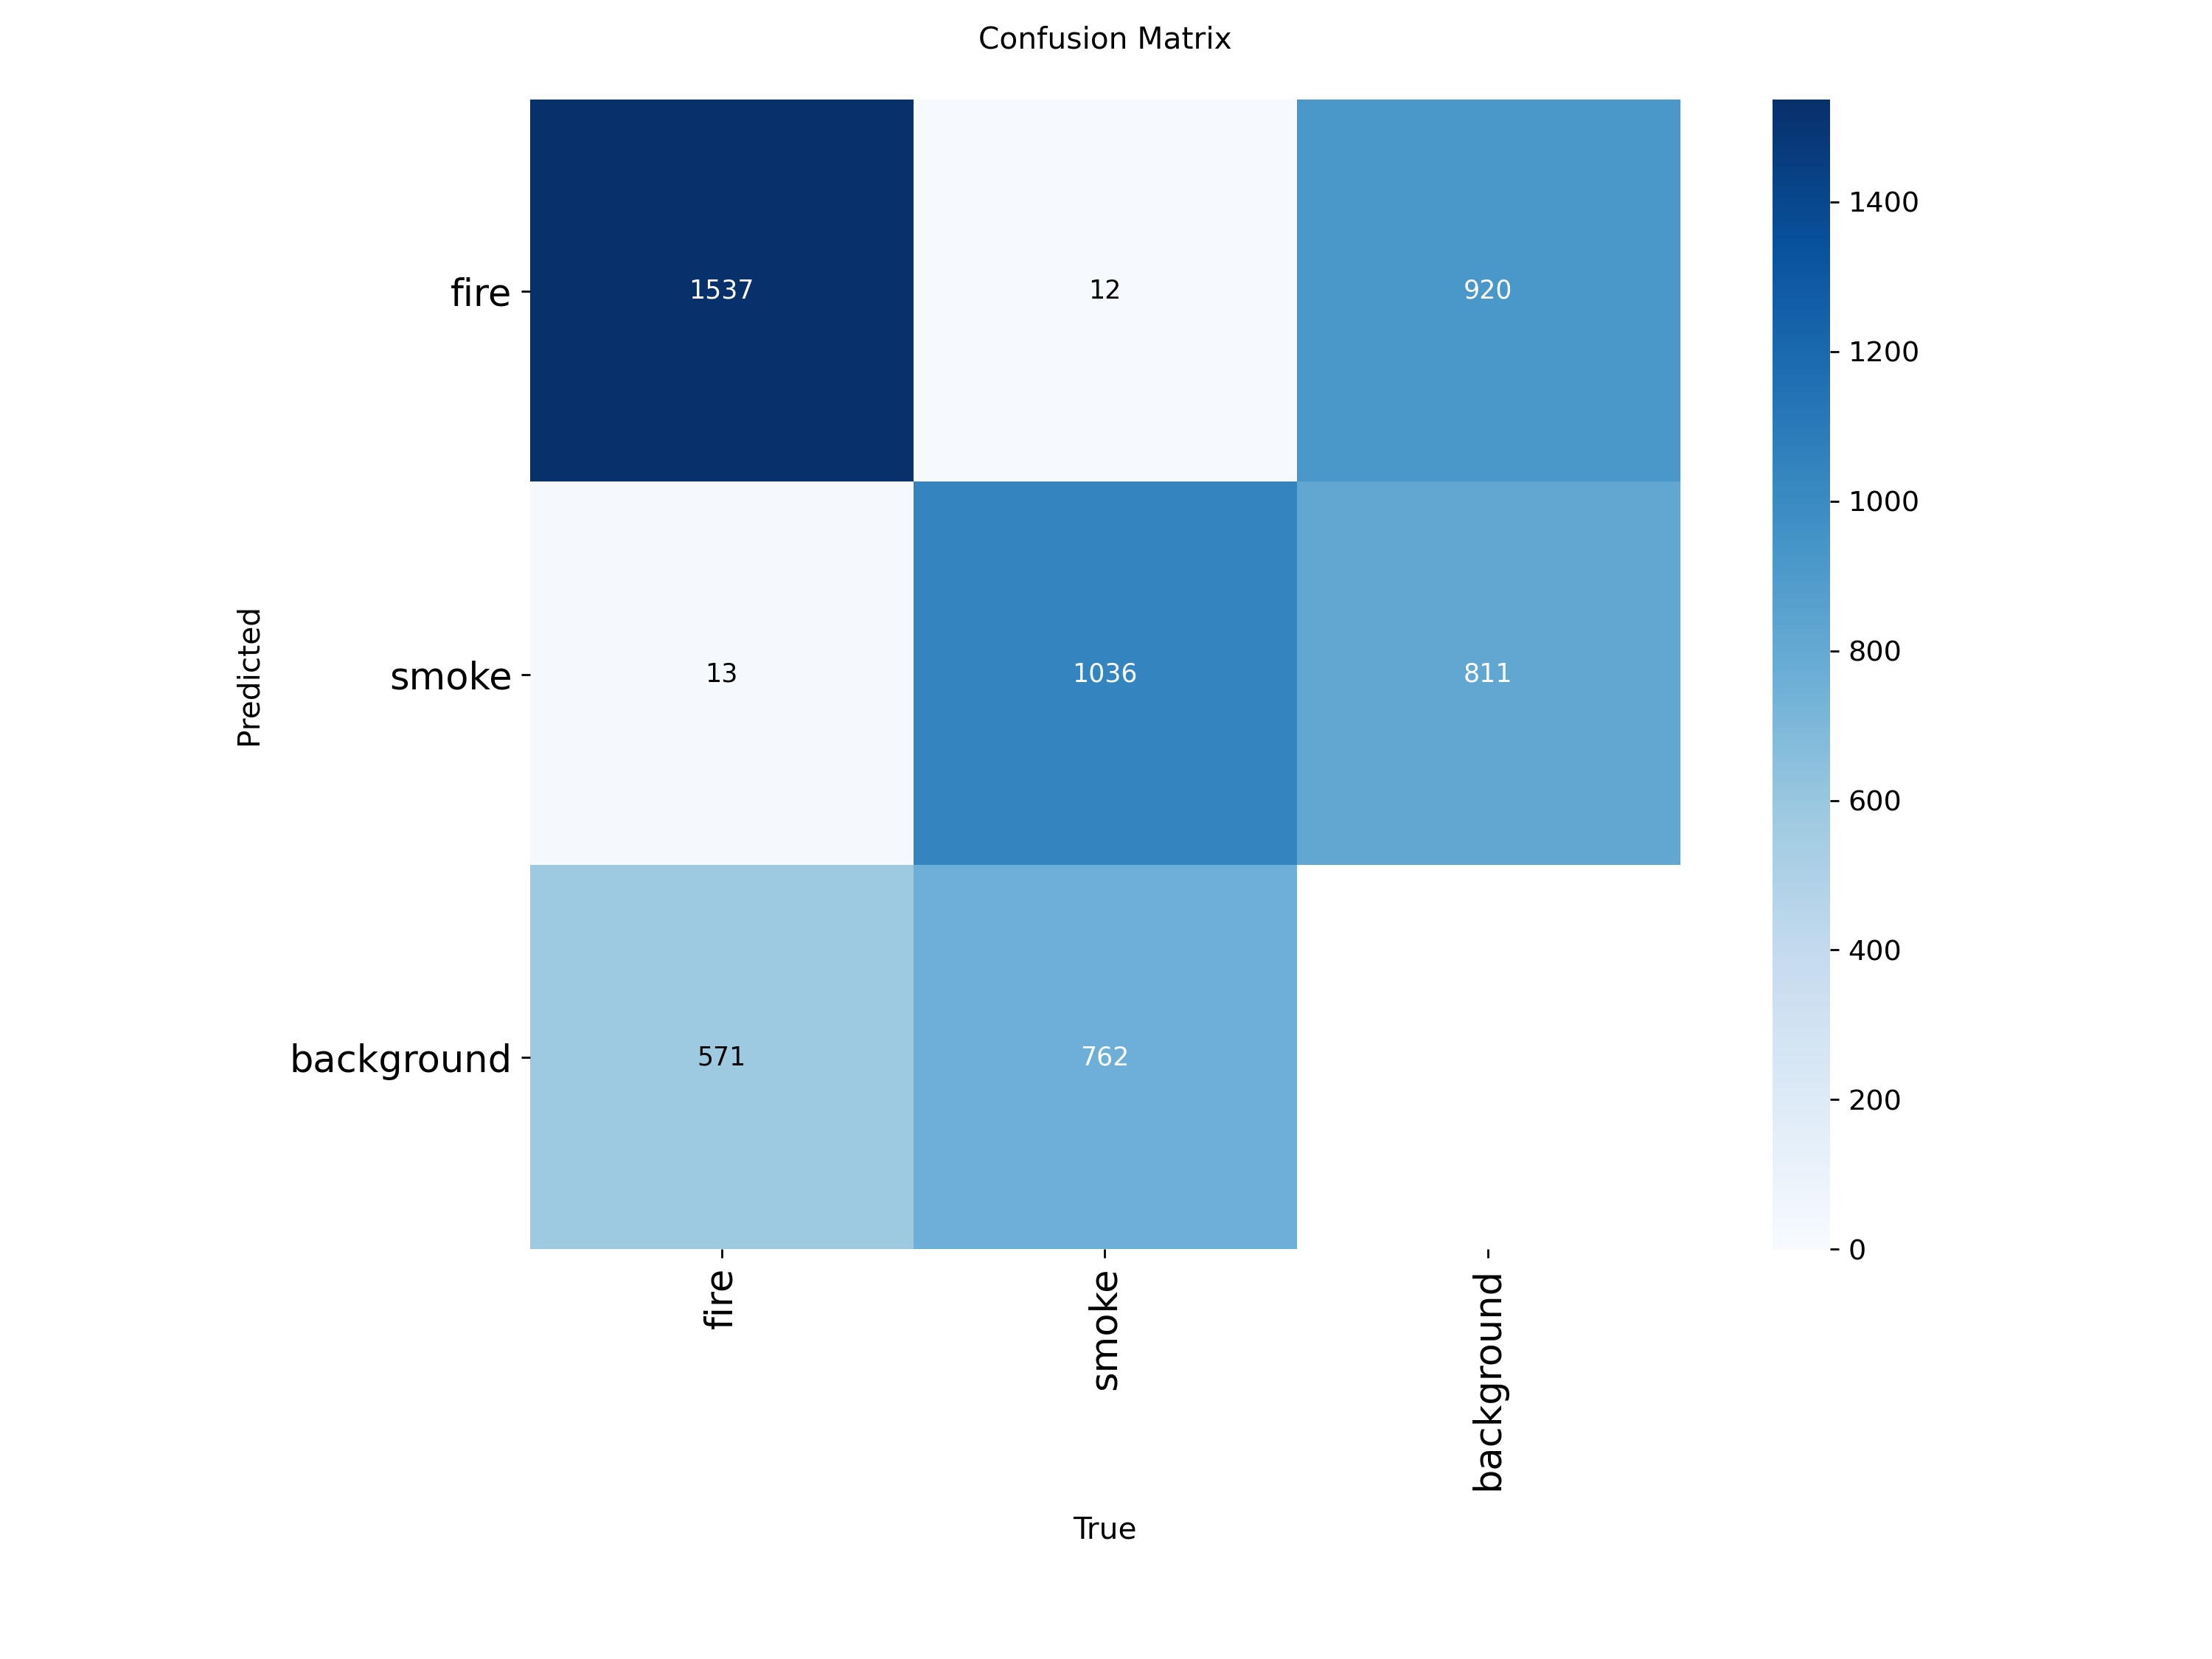


🚀 Training model: C:/Users/Cloud Playground/OneDrive - Sam Houston State University/Documents/SHSU/Fall 2025/Semina/Yolo11_Demonstartion of Configuration Experiemnt/New_Variants/yolo11m.yaml
New https://pypi.org/project/ultralytics/8.3.230 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.229  Python-3.11.0 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 5070, 12227MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:/Users/Cloud Playground/OneDrive - Sam Houston State University/Documents/SHSU/Fall 2025/Semina/Yolo11_Demonstartion of Configuration Experiemnt/datasets/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, form

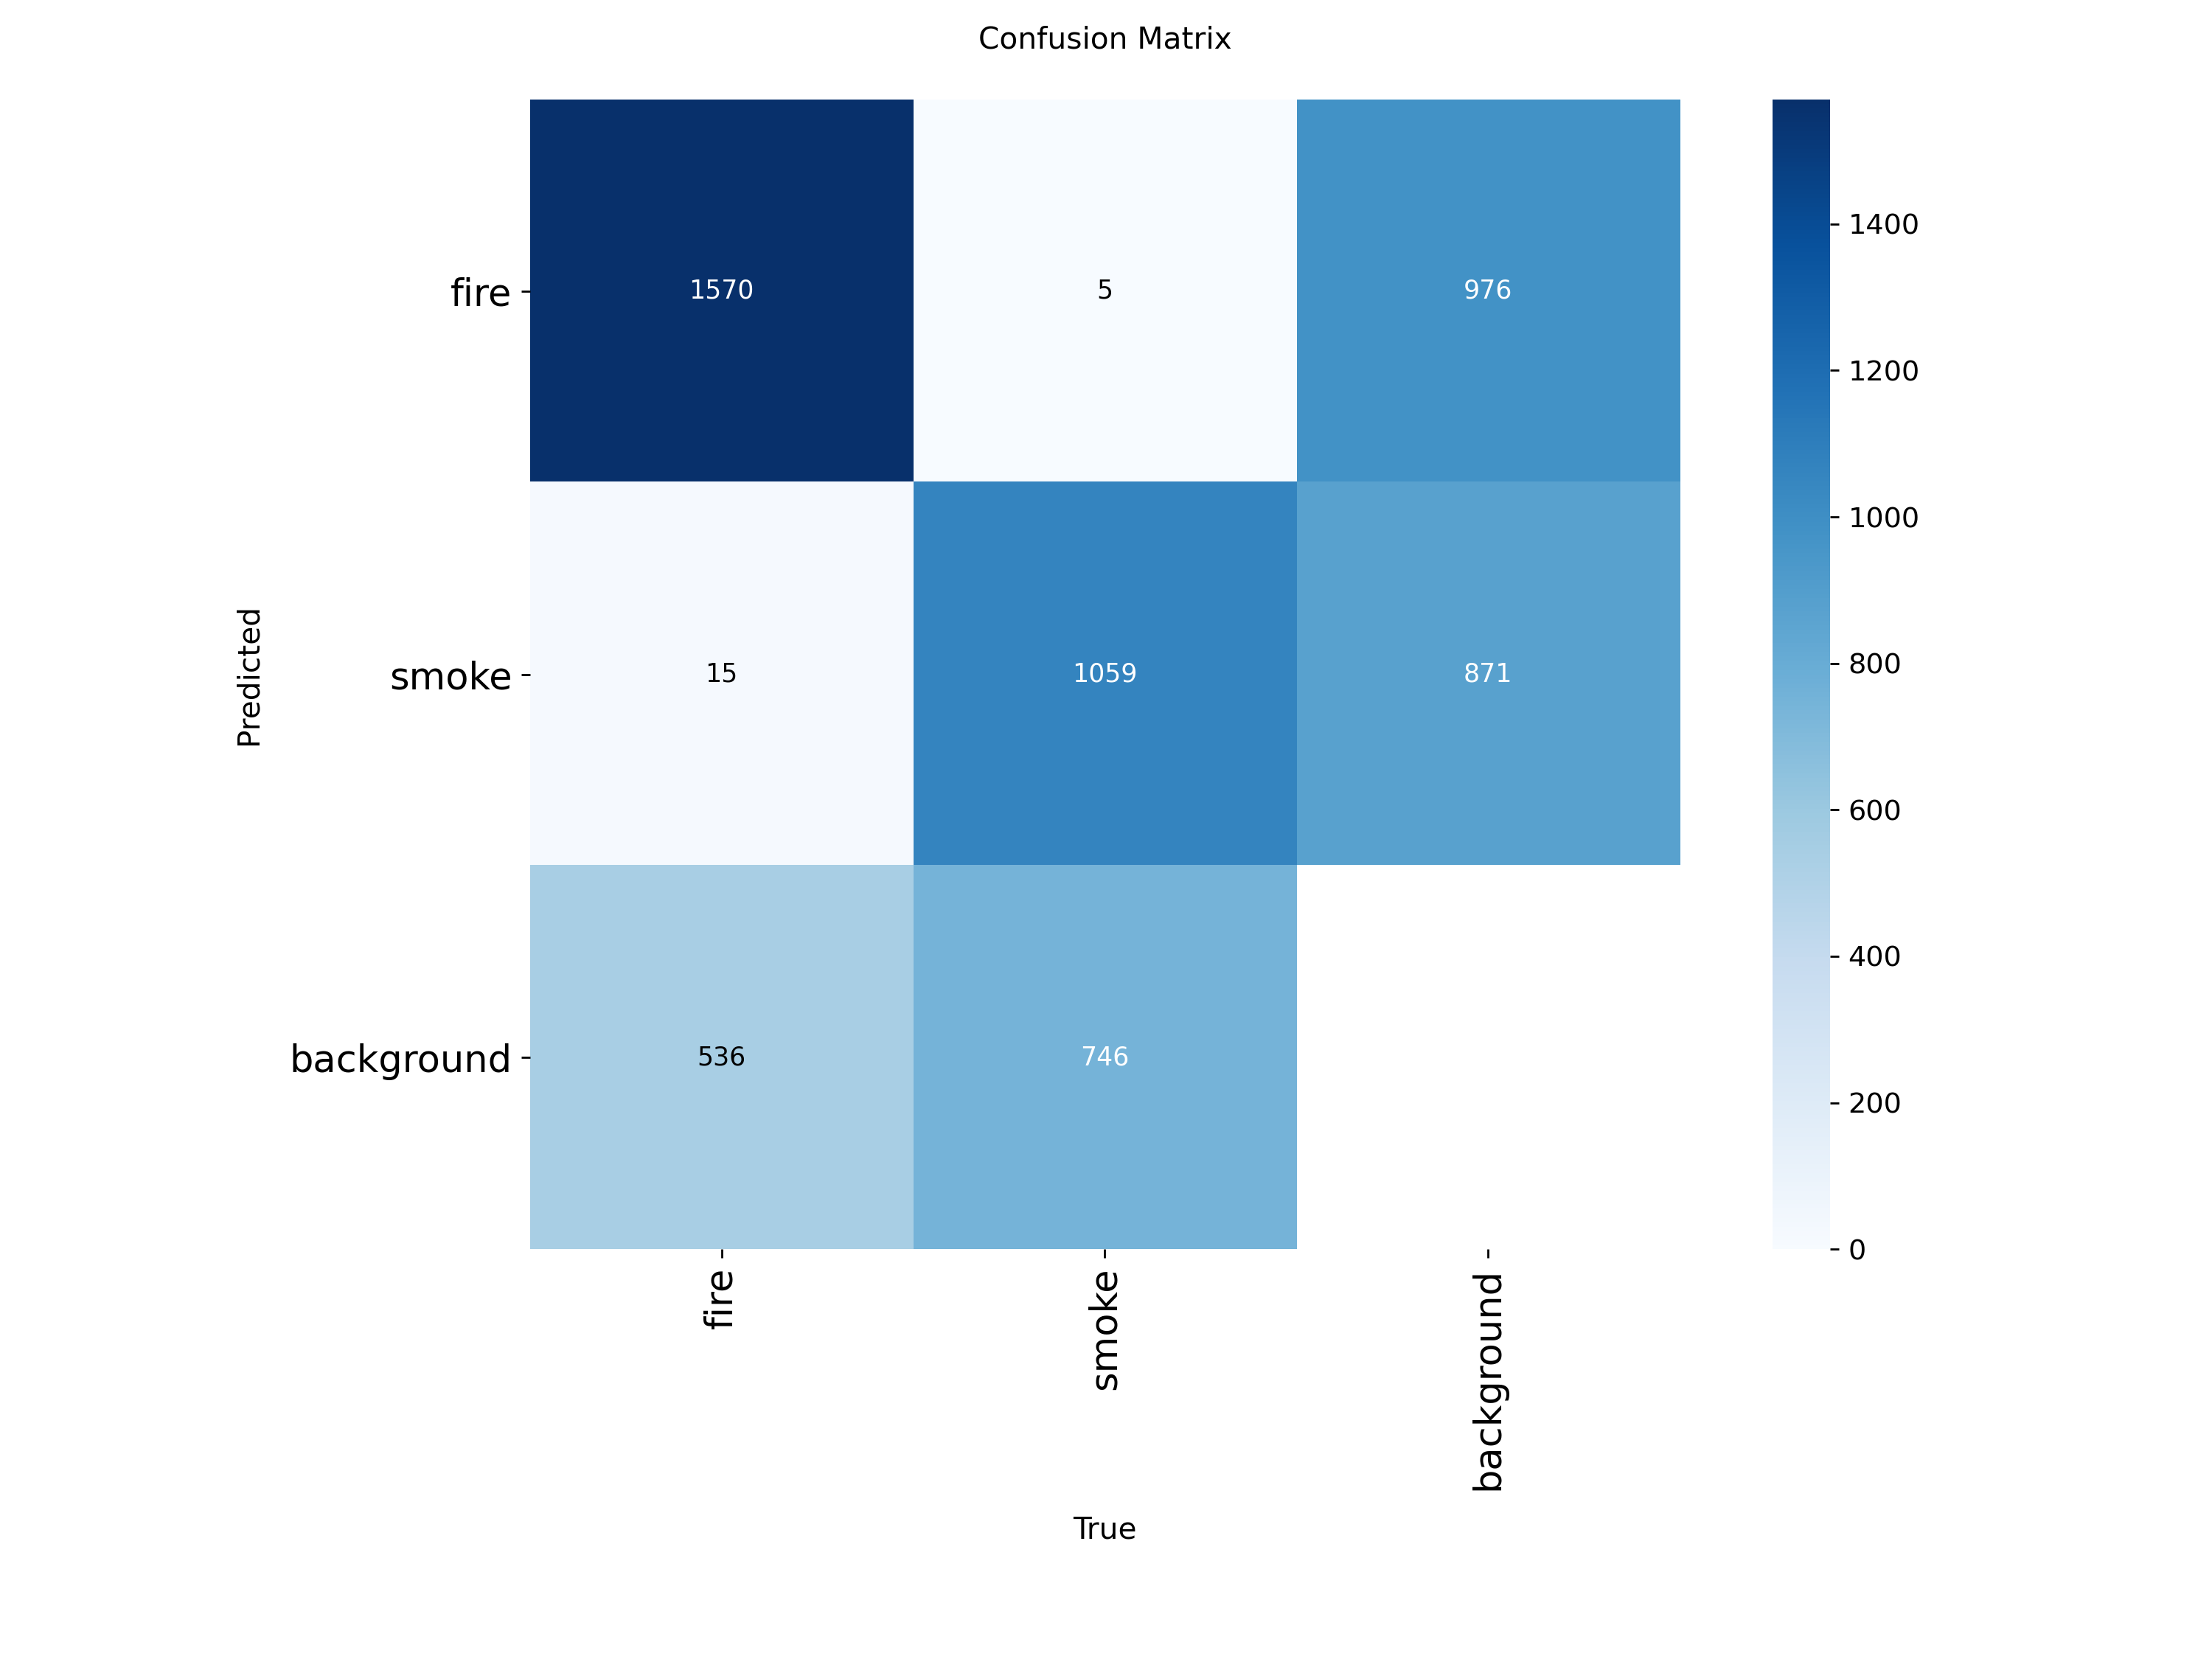


✅ ABLATION STUDY COMPLETE

📊 MODEL PERFORMANCE RANKING:
1. yolo11s    | mAP50-95: 0.2440 | mAP50: 0.5837
2. yolo11m    | mAP50-95: 0.2410 | mAP50: 0.5811
3. yolo11n    | mAP50-95: 0.2399 | mAP50: 0.5767

🏆 BEST MODEL:
   Model: yolo11s
   mAP50-95: 0.2440
   Saved to: C:/Users/Cloud Playground/OneDrive - Sam Houston State University/Documents/SHSU/Fall 2025/Semina/Yolo11_Demonstartion of Configuration Experiemnt/datasets\best_worst_models\BEST_model_yolo11s.pt

🔻 WORST MODEL:
   Model: yolo11n
   mAP50-95: 0.2399
   Saved to: C:/Users/Cloud Playground/OneDrive - Sam Houston State University/Documents/SHSU/Fall 2025/Semina/Yolo11_Demonstartion of Configuration Experiemnt/datasets\best_worst_models\WORST_model_yolo11n.pt

💾 All models saved in: runs/ablation/
💾 Best/Worst models saved in: C:/Users/Cloud Playground/OneDrive - Sam Houston State University/Documents/SHSU/Fall 2025/Semina/Yolo11_Demonstartion of Configuration Experiemnt/datasets\best_worst_models
📊 Performance comparison sa

In [ ]:
import os
import torch
import pandas as pd
import tkinter as tk
from tkinter import filedialog, Checkbutton, IntVar, Button, Label
from ultralytics import YOLO
from IPython.display import Image, display
import shutil

# ============ STEP 1: SELECT DATA.YAML ============

root = tk.Tk()
root.withdraw()
root.attributes('-topmost', True)

print("Step 1: Select your data.yaml file...")
DATA_YAML_PATH = filedialog.askopenfilename(
    title="Select data.yaml file",
    filetypes=[("YAML files", "*.yaml *.yml"), ("All files", "*.*")]
)

if not DATA_YAML_PATH:
    raise ValueError("No data.yaml file selected!")

print(f"✓ Selected: {DATA_YAML_PATH}")

# ============ STEP 2: SELECT VARIANT YAML FILES ============

print("\nStep 2: Select which model variants to use...")

def select_variant_files():
    """Let user select which variant YAML files to use with checkboxes, then select files"""
    
    selection_window = tk.Toplevel()
    selection_window.title("Select YOLO11 Variants")
    selection_window.geometry("350x280")
    selection_window.attributes('-topmost', True)
    
    Label(selection_window, text="Select variants to train:", 
          font=("Arial", 12, "bold")).pack(pady=10)
    
    Label(selection_window, text="(You'll select file locations next)", 
          font=("Arial", 9, "italic"), fg="gray").pack()
    
    variants_dict = {}
    available_variants = ["n", "s", "m", "l", "x"]
    
    for variant in available_variants:
        var = IntVar()
        Checkbutton(
            selection_window, 
            text=f"YOLO11{variant} - {variant.upper()} variant", 
            variable=var,
            font=("Arial", 10)
        ).pack(anchor='w', padx=30, pady=5)
        variants_dict[variant] = var
    
    selected = []
    
    def on_submit():
        nonlocal selected
        selected = [k for k, v in variants_dict.items() if v.get() == 1]
        selection_window.destroy()
    
    Button(
        selection_window, 
        text="Next: Select Files", 
        command=on_submit, 
        bg="green", 
        fg="white", 
        font=("Arial", 10, "bold"),
        padx=20,
        pady=5
    ).pack(pady=15)
    
    selection_window.wait_window()
    return selected

# Get which variants user wants
selected_variant_names = select_variant_files()

if not selected_variant_names:
    root.destroy()
    raise ValueError("No variants selected!")

print(f"✓ Selected variants: {selected_variant_names}")

# ============ STEP 3: SELECT FILE LOCATIONS FOR EACH VARIANT ============

print("\nStep 3: Select the YAML file location for each variant...")

variants = []
variant_file_map = {}

for variant_name in selected_variant_names:
    print(f"\nSelect YOLO11{variant_name}.yaml file location...")
    
    # Suggest default filename
    suggested_name = f"yolo11{variant_name}.yaml"
    
    file_path = filedialog.askopenfilename(
        title=f"Select yolo11{variant_name}.yaml file",
        filetypes=[("YAML files", "*.yaml *.yml"), ("All files", "*.*")],
        initialfile=suggested_name
    )
    
    if not file_path:
        print(f"⚠️ Warning: Skipping {variant_name} variant (no file selected)")
        continue
    
    if not os.path.exists(file_path):
        print(f"⚠️ Warning: File not found: {file_path}")
        continue
    
    variants.append(file_path)
    variant_file_map[variant_name] = file_path
    print(f"✓ {variant_name}: {file_path}")

root.destroy()

if not variants:
    raise ValueError("No valid variant files selected!")

print(f"\n✅ Total variants to train: {len(variants)}")

# ============ TRAINING LOOP ============

ablation_metrics = {}
all_losses = None
model_performances = {}

for v in variants:
    print(f"\n{'='*60}")
    print(f"🚀 Training model: {v}")
    print(f"{'='*60}")
    
    model = YOLO(v)
    
    # Train model
    results = model.train(
        data=DATA_YAML_PATH,
        epochs=100,
        imgsz=640,
        batch=8,
        name=f"ablation_{os.path.basename(v).replace('.yaml','')}",
        project="runs/ablation",
        device=0 if torch.cuda.is_available() else "cpu",
        plots=True
        # exist_ok=True  # This will overwrite instead of creating new folders
    )
    
    # Validate model
    res = model.val()
    ablation_metrics[v] = res
    
    # Store performance metric (mAP50-95)
    model_performances[v] = {
        'map50_95': res.box.map,
        'map50': res.box.map50,
        'map75': res.box.map75,
        'model_path': f"runs/ablation/ablation_{os.path.basename(v).replace('.yaml','')}/weights/best.pt"
    }
    
    # Display confusion matrix
    cm = f"{res.save_dir}/confusion_matrix.png"
    if os.path.exists(cm):
        print(f"\n📊 Confusion Matrix for {v}")
        display(Image(cm))
    
    # Collect training results
    csv_path = f"runs/ablation/ablation_{os.path.basename(v).replace('.yaml','')}/results.csv"
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
        df["scale"] = os.path.basename(v).replace(".yaml","")
        all_losses = df if all_losses is None else pd.concat([all_losses, df], ignore_index=True)

# ============ SAVE BEST & WORST MODELS ============

# Rank models by mAP50-95
sorted_models = sorted(model_performances.items(), key=lambda x: x[1]['map50_95'], reverse=True)
best_model = sorted_models[0]
worst_model = sorted_models[-1]

# Create output directory (use same directory as data.yaml)
output_dir = os.path.join(os.path.dirname(DATA_YAML_PATH), "best_worst_models")
os.makedirs(output_dir, exist_ok=True)

# Copy best model
best_src = best_model[1]['model_path']
best_dst = os.path.join(output_dir, f"BEST_model_{os.path.basename(best_model[0]).replace('.yaml','')}.pt")
shutil.copy2(best_src, best_dst)

# Copy worst model
worst_src = worst_model[1]['model_path']
worst_dst = os.path.join(output_dir, f"WORST_model_{os.path.basename(worst_model[0]).replace('.yaml','')}.pt")
shutil.copy2(worst_src, worst_dst)

# ============ RESULTS SUMMARY ============

print("\n" + "="*60)
print("✅ ABLATION STUDY COMPLETE")
print("="*60)

print("\n📊 MODEL PERFORMANCE RANKING:")
for i, (model_path, metrics) in enumerate(sorted_models, 1):
    model_name = os.path.basename(model_path).replace('.yaml', '')
    print(f"{i}. {model_name:10s} | mAP50-95: {metrics['map50_95']:.4f} | mAP50: {metrics['map50']:.4f}")

print(f"\n🏆 BEST MODEL:")
print(f"   Model: {os.path.basename(best_model[0]).replace('.yaml','')}")
print(f"   mAP50-95: {best_model[1]['map50_95']:.4f}")
print(f"   Saved to: {best_dst}")

print(f"\n🔻 WORST MODEL:")
print(f"   Model: {os.path.basename(worst_model[0]).replace('.yaml','')}")
print(f"   mAP50-95: {worst_model[1]['map50_95']:.4f}")
print(f"   Saved to: {worst_dst}")

print(f"\n💾 All models saved in: runs/ablation/")
print(f"💾 Best/Worst models saved in: {output_dir}")

# Save performance comparison
performance_df = pd.DataFrame([
    {
        'Model': os.path.basename(k).replace('.yaml',''),
        'mAP50-95': v['map50_95'],
        'mAP50': v['map50'],
        'mAP75': v['map75'],
        'File_Path': k
    } for k, v in model_performances.items()
]).sort_values('mAP50-95', ascending=False)

perf_csv = os.path.join(output_dir, "performance_comparison.csv")
performance_df.to_csv(perf_csv, index=False)
print(f"📊 Performance comparison saved: {perf_csv}")

# Display file mapping
print(f"\n📁 VARIANT FILE MAPPING:")
for variant_name, file_path in variant_file_map.items():
    print(f"   {variant_name}: {file_path}")


### Export Generated Outputs and Trained Models

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import shutil
from pathlib import Path

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# ============ CREATE RESULTS DIRECTORY ============

# Create main results directory alongside data.yaml
results_dir = os.path.join(os.path.dirname(DATA_YAML_PATH), "results")
os.makedirs(results_dir, exist_ok=True)

# Create subdirectories
plots_dir = os.path.join(results_dir, "plots")
metrics_dir = os.path.join(results_dir, "metrics_csv")
models_dir = os.path.join(results_dir, "best_worst_models")

os.makedirs(plots_dir, exist_ok=True)
os.makedirs(metrics_dir, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)

print("="*60)
print("📁 RESULTS DIRECTORY STRUCTURE")
print("="*60)
print(f"Main results folder: {results_dir}")
print(f"  ├── plots/              (all visualizations)")
print(f"  ├── metrics_csv/        (all CSV files)")
print(f"  └── best_worst_models/  (best & worst .pt files)")
print("="*60 + "\n")

print("Generating comprehensive evaluation metrics and visualizations...")

# ============ SAVE INDIVIDUAL VARIANT METRICS ============

print("\n📊 Saving individual variant metrics to CSV...")
for v in variants:
    scale_name = os.path.basename(v).replace('.yaml', '')
    
    # Copy individual results.csv
    src_csv = f"runs/ablation/ablation_{scale_name}/results.csv"
    if os.path.exists(src_csv):
        dst_csv = os.path.join(metrics_dir, f"training_metrics_{scale_name}.csv")
        shutil.copy2(src_csv, dst_csv)
        print(f"✓ Saved: training_metrics_{scale_name}.csv")

# ============ SAVE COMBINED METRICS ============

print("\n📊 Saving combined training metrics...")

# Save all losses combined (all variants together)
if all_losses is not None:
    combined_csv = os.path.join(metrics_dir, "all_variants_training_metrics.csv")
    all_losses.to_csv(combined_csv, index=False)
    print(f"✓ Saved: all_variants_training_metrics.csv ({len(all_losses)} rows)")

# ============ SAVE PERFORMANCE SUMMARY ============

print("\n📊 Saving performance comparison...")

# Overall performance comparison
perf_csv = os.path.join(metrics_dir, "performance_comparison.csv")
performance_df.to_csv(perf_csv, index=False)
print(f"✓ Saved: performance_comparison.csv")

# Detailed performance metrics for each variant
detailed_metrics = []
for v, metrics in model_performances.items():
    variant_name = os.path.basename(v).replace('.yaml', '')
    detailed_metrics.append({
        'Variant': variant_name,
        'mAP50-95': metrics['map50_95'],
        'mAP50': metrics['map50'],
        'mAP75': metrics['map75'],
        'Model_Path': metrics['model_path'],
        'YAML_Path': v
    })

detailed_df = pd.DataFrame(detailed_metrics).sort_values('mAP50-95', ascending=False)
detailed_csv = os.path.join(metrics_dir, "detailed_performance_metrics.csv")
detailed_df.to_csv(detailed_csv, index=False)
print(f"✓ Saved: detailed_performance_metrics.csv")

# ============ SAVE FINAL EPOCH METRICS ============

print("\n📊 Extracting final epoch metrics...")

final_metrics = []
for scale in all_losses['scale'].unique():
    scale_data = all_losses[all_losses['scale'] == scale]
    final_epoch = scale_data.iloc[-1]  # Last epoch
    
    final_metrics.append({
        'Variant': scale,
        'Final_Epoch': int(final_epoch['epoch']),
        'Train_Box_Loss': final_epoch['train/box_loss'],
        'Train_Cls_Loss': final_epoch['train/cls_loss'],
        'Train_DFL_Loss': final_epoch['train/dfl_loss'],
        'Val_Box_Loss': final_epoch['val/box_loss'],
        'Val_Cls_Loss': final_epoch['val/cls_loss'],
        'Val_DFL_Loss': final_epoch['val/dfl_loss'],
        'Precision': final_epoch['metrics/precision(B)'],
        'Recall': final_epoch['metrics/recall(B)'],
        'mAP50': final_epoch['metrics/mAP50(B)'],
        'mAP50-95': final_epoch['metrics/mAP50-95(B)'],
        'Training_Time_Sec': final_epoch['time']
    })

final_metrics_df = pd.DataFrame(final_metrics).sort_values('mAP50-95', ascending=False)
final_metrics_csv = os.path.join(metrics_dir, "final_epoch_metrics.csv")
final_metrics_df.to_csv(final_metrics_csv, index=False)
print(f"✓ Saved: final_epoch_metrics.csv")

# ============ SAVE TRAINING SUMMARY STATISTICS ============

print("\n📊 Calculating summary statistics...")

summary_stats = []
for scale in all_losses['scale'].unique():
    scale_data = all_losses[all_losses['scale'] == scale]
    
    summary_stats.append({
        'Variant': scale,
        'Epochs': len(scale_data),
        'Total_Time_Sec': scale_data['time'].max(),
        'Avg_Time_Per_Epoch': scale_data['time'].max() / len(scale_data),
        'Best_mAP50': scale_data['metrics/mAP50(B)'].max(),
        'Best_mAP50-95': scale_data['metrics/mAP50-95(B)'].max(),
        'Best_Precision': scale_data['metrics/precision(B)'].max(),
        'Best_Recall': scale_data['metrics/recall(B)'].max(),
        'Final_Train_Loss': scale_data.iloc[-1]['train/box_loss'] + scale_data.iloc[-1]['train/cls_loss'] + scale_data.iloc[-1]['train/dfl_loss'],
        'Final_Val_Loss': scale_data.iloc[-1]['val/box_loss'] + scale_data.iloc[-1]['val/cls_loss'] + scale_data.iloc[-1]['val/dfl_loss']
    })

summary_df = pd.DataFrame(summary_stats).sort_values('Best_mAP50-95', ascending=False)
summary_csv = os.path.join(metrics_dir, "training_summary_statistics.csv")
summary_df.to_csv(summary_csv, index=False)
print(f"✓ Saved: training_summary_statistics.csv")

# ============ 1. TRAINING VS VALIDATION LOSS ============

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Training Metrics Across Model Scales', fontsize=16, fontweight='bold')

# Box Loss
for scale in all_losses['scale'].unique():
    data = all_losses[all_losses['scale'] == scale]
    axes[0, 0].plot(data['epoch'], data['train/box_loss'], label=f'{scale} (train)', linestyle='-')
    axes[0, 0].plot(data['epoch'], data['val/box_loss'], label=f'{scale} (val)', linestyle='--')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Box Loss')
axes[0, 0].set_title('Box Loss: Training vs Validation')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Class Loss
for scale in all_losses['scale'].unique():
    data = all_losses[all_losses['scale'] == scale]
    axes[0, 1].plot(data['epoch'], data['train/cls_loss'], label=f'{scale} (train)', linestyle='-')
    axes[0, 1].plot(data['epoch'], data['val/cls_loss'], label=f'{scale} (val)', linestyle='--')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Classification Loss')
axes[0, 1].set_title('Classification Loss: Training vs Validation')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# DFL Loss
for scale in all_losses['scale'].unique():
    data = all_losses[all_losses['scale'] == scale]
    axes[1, 0].plot(data['epoch'], data['train/dfl_loss'], label=f'{scale} (train)', linestyle='-')
    axes[1, 0].plot(data['epoch'], data['val/dfl_loss'], label=f'{scale} (val)', linestyle='--')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('DFL Loss')
axes[1, 0].set_title('Distribution Focal Loss: Training vs Validation')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Learning Rate
for scale in all_losses['scale'].unique():
    data = all_losses[all_losses['scale'] == scale]
    if 'lr/pg0' in data.columns:
        axes[1, 1].plot(data['epoch'], data['lr/pg0'], label=f'{scale}')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Learning Rate')
axes[1, 1].set_title('Learning Rate Schedule')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(plots_dir, '1_training_validation_losses.png'), dpi=300, bbox_inches='tight')
print(f"✓ Saved: plots/1_training_validation_losses.png")
plt.show()

# ============ 2. mAP METRICS ACROSS SCALES ============

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Mean Average Precision (mAP) Across Model Scales', fontsize=16, fontweight='bold')

# mAP50
for scale in all_losses['scale'].unique():
    data = all_losses[all_losses['scale'] == scale]
    if 'metrics/mAP50(B)' in data.columns:
        axes[0, 0].plot(data['epoch'], data['metrics/mAP50(B)'], label=f'{scale}', linewidth=2)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('mAP@0.5')
axes[0, 0].set_title('mAP@0.5 Across Epochs')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# mAP50-95
for scale in all_losses['scale'].unique():
    data = all_losses[all_losses['scale'] == scale]
    if 'metrics/mAP50-95(B)' in data.columns:
        axes[0, 1].plot(data['epoch'], data['metrics/mAP50-95(B)'], label=f'{scale}', linewidth=2)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('mAP@0.5:0.95')
axes[0, 1].set_title('mAP@0.5:0.95 Across Epochs')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Precision
for scale in all_losses['scale'].unique():
    data = all_losses[all_losses['scale'] == scale]
    if 'metrics/precision(B)' in data.columns:
        axes[1, 0].plot(data['epoch'], data['metrics/precision(B)'], label=f'{scale}', linewidth=2)
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision Across Epochs')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Recall
for scale in all_losses['scale'].unique():
    data = all_losses[all_losses['scale'] == scale]
    if 'metrics/recall(B)' in data.columns:
        axes[1, 1].plot(data['epoch'], data['metrics/recall(B)'], label=f'{scale}', linewidth=2)
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].set_title('Recall Across Epochs')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(plots_dir, '2_map_precision_recall.png'), dpi=300, bbox_inches='tight')
print(f"✓ Saved: plots/2_map_precision_recall.png")
plt.show()

# ============ 3. FINAL PERFORMANCE COMPARISON ============

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart comparison
metrics_names = ['mAP50-95', 'mAP50', 'mAP75']
x = np.arange(len(performance_df))
width = 0.25

for i, metric in enumerate(metrics_names):
    if metric in performance_df.columns:
        axes[0].bar(x + i*width, performance_df[metric], width, label=metric)

axes[0].set_xlabel('Model Scale')
axes[0].set_ylabel('Score')
axes[0].set_title('Final Performance Comparison')
axes[0].set_xticks(x + width)
axes[0].set_xticklabels(performance_df['Model'])
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Heatmap of metrics
heatmap_data = performance_df.set_index('Model')[['mAP50-95', 'mAP50', 'mAP75']].T
sns.heatmap(heatmap_data, annot=True, fmt='.4f', cmap='YlOrRd', ax=axes[1], cbar_kws={'label': 'Score'})
axes[1].set_title('Performance Heatmap')
axes[1].set_xlabel('Model Scale')
axes[1].set_ylabel('Metric')

plt.tight_layout()
plt.savefig(os.path.join(plots_dir, '3_final_performance_comparison.png'), dpi=300, bbox_inches='tight')
print(f"✓ Saved: plots/3_final_performance_comparison.png")
plt.show()

# ============ 4. CONFUSION MATRICES COMPILATION ============

print("\n📊 Copying confusion matrices...")
for v in variants:
    scale_name = os.path.basename(v).replace('.yaml', '')
    cm_src = f"runs/ablation/ablation_{scale_name}/confusion_matrix.png"
    
    if os.path.exists(cm_src):
        cm_dst = os.path.join(plots_dir, f'4_confusion_matrix_{scale_name}.png')
        shutil.copy2(cm_src, cm_dst)
        print(f"✓ Copied: plots/4_confusion_matrix_{scale_name}.png")

# ============ 5. PR CURVES & F1 CURVES ============

print("\n📈 Copying PR and F1 curves...")
for v in variants:
    scale_name = os.path.basename(v).replace('.yaml', '')
    
    # PR Curve
    pr_src = f"runs/ablation/ablation_{scale_name}/PR_curve.png"
    if os.path.exists(pr_src):
        pr_dst = os.path.join(plots_dir, f'5_PR_curve_{scale_name}.png')
        shutil.copy2(pr_src, pr_dst)
        print(f"✓ Copied: plots/5_PR_curve_{scale_name}.png")
    
    # F1 Curve
    f1_src = f"runs/ablation/ablation_{scale_name}/F1_curve.png"
    if os.path.exists(f1_src):
        f1_dst = os.path.join(plots_dir, f'6_F1_curve_{scale_name}.png')
        shutil.copy2(f1_src, f1_dst)
        print(f"✓ Copied: plots/6_F1_curve_{scale_name}.png")

# ============ 6. TRAINING CURVES FROM YOLO ============

print("\n📉 Copying training result plots...")
for v in variants:
    scale_name = os.path.basename(v).replace('.yaml', '')
    results_src = f"runs/ablation/ablation_{scale_name}/results.png"
    
    if os.path.exists(results_src):
        results_dst = os.path.join(plots_dir, f'7_training_results_{scale_name}.png')
        shutil.copy2(results_src, results_dst)
        print(f"✓ Copied: plots/7_training_results_{scale_name}.png")

# ============ COPY BEST & WORST MODELS ============

print("\n💾 Copying best and worst models...")

# Copy best model
best_src = best_model[1]['model_path']
best_dst = os.path.join(models_dir, f"BEST_model_{os.path.basename(best_model[0]).replace('.yaml','')}.pt")
shutil.copy2(best_src, best_dst)
print(f"✓ Copied: BEST_model_{os.path.basename(best_model[0]).replace('.yaml','')}.pt")

# Copy worst model
worst_src = worst_model[1]['model_path']
worst_dst = os.path.join(models_dir, f"WORST_model_{os.path.basename(worst_model[0]).replace('.yaml','')}.pt")
shutil.copy2(worst_src, worst_dst)
print(f"✓ Copied: WORST_model_{os.path.basename(worst_model[0]).replace('.yaml','')}.pt")

# ============ CREATE MASTER SUMMARY FILE ============

print("\n📄 Creating master summary report...")

master_summary = {
    'Study_Info': {
        'Total_Variants_Trained': len(variants),
        'Variants': list(performance_df['Model']),
        'Data_YAML': DATA_YAML_PATH,
        'Results_Directory': results_dir
    },
    'Best_Model': {
        'Variant': os.path.basename(best_model[0]).replace('.yaml',''),
        'mAP50-95': best_model[1]['map50_95'],
        'mAP50': best_model[1]['map50'],
        'mAP75': best_model[1]['map75'],
        'Model_Path': best_dst
    },
    'Worst_Model': {
        'Variant': os.path.basename(worst_model[0]).replace('.yaml',''),
        'mAP50-95': worst_model[1]['map50_95'],
        'mAP50': worst_model[1]['map50'],
        'mAP75': worst_model[1]['map75'],
        'Model_Path': worst_dst
    },
    'Files_Generated': {
        'CSV_Files': [
            'all_variants_training_metrics.csv',
            'performance_comparison.csv',
            'detailed_performance_metrics.csv',
            'final_epoch_metrics.csv',
            'training_summary_statistics.csv'
        ] + [f'training_metrics_{os.path.basename(v).replace(".yaml","")}.csv' for v in variants],
        'Plot_Files': len([f for f in os.listdir(plots_dir) if f.endswith('.png')]),
        'Model_Files': 2
    }
}

# Save summary as text file
summary_file = os.path.join(results_dir, "MASTER_SUMMARY.txt")
with open(summary_file, 'w') as f:
    f.write("="*80 + "\n")
    f.write("YOLO ABLATION STUDY - MASTER SUMMARY\n")
    f.write("="*80 + "\n\n")
    
    f.write("STUDY INFORMATION\n")
    f.write("-"*80 + "\n")
    f.write(f"Total Variants Trained: {master_summary['Study_Info']['Total_Variants_Trained']}\n")
    f.write(f"Variants: {', '.join(master_summary['Study_Info']['Variants'])}\n")
    f.write(f"Results Directory: {results_dir}\n\n")
    
    f.write("BEST PERFORMING MODEL\n")
    f.write("-"*80 + "\n")
    f.write(f"Variant: {master_summary['Best_Model']['Variant']}\n")
    f.write(f"mAP50-95: {master_summary['Best_Model']['mAP50-95']:.4f}\n")
    f.write(f"mAP50: {master_summary['Best_Model']['mAP50']:.4f}\n")
    f.write(f"mAP75: {master_summary['Best_Model']['mAP75']:.4f}\n")
    f.write(f"Model Path: {master_summary['Best_Model']['Model_Path']}\n\n")
    
    f.write("WORST PERFORMING MODEL\n")
    f.write("-"*80 + "\n")
    f.write(f"Variant: {master_summary['Worst_Model']['Variant']}\n")
    f.write(f"mAP50-95: {master_summary['Worst_Model']['mAP50-95']:.4f}\n")
    f.write(f"mAP50: {master_summary['Worst_Model']['mAP50']:.4f}\n")
    f.write(f"mAP75: {master_summary['Worst_Model']['mAP75']:.4f}\n")
    f.write(f"Model Path: {master_summary['Worst_Model']['Model_Path']}\n\n")
    
    f.write("FILES GENERATED\n")
    f.write("-"*80 + "\n")
    f.write(f"CSV Metric Files: {len(master_summary['Files_Generated']['CSV_Files'])}\n")
    f.write(f"Plot/Visualization Files: {master_summary['Files_Generated']['Plot_Files']}\n")
    f.write(f"Model Files: {master_summary['Files_Generated']['Model_Files']}\n\n")
    
    f.write("DETAILED PERFORMANCE RANKING\n")
    f.write("-"*80 + "\n")
    for i, row in performance_df.iterrows():
        f.write(f"{i+1}. {row['Model']:10s} | mAP50-95: {row['mAP50-95']:.4f} | mAP50: {row['mAP50']:.4f} | mAP75: {row['mAP75']:.4f}\n")

print(f"✓ Saved: MASTER_SUMMARY.txt")

# ============ FINAL SUMMARY ============

print("\n" + "="*80)
print("✅ COMPREHENSIVE EVALUATION COMPLETE")
print("="*80)
print(f"\n📁 ALL RESULTS SAVED TO: {results_dir}")
print(f"\n📊 CSV METRICS ({len(os.listdir(metrics_dir))} files):")
print(f"   • all_variants_training_metrics.csv")
print(f"   • performance_comparison.csv")
print(f"   • detailed_performance_metrics.csv")
print(f"   • final_epoch_metrics.csv")
print(f"   • training_summary_statistics.csv")
print(f"   • Individual variant CSVs for each model")
print(f"\n📈 VISUALIZATIONS ({len([f for f in os.listdir(plots_dir) if f.endswith('.png')])} plots):")
print(f"   • Training vs Validation Losses")
print(f"   • mAP Metrics (mAP50, mAP50-95, Precision, Recall)")
print(f"   • Performance Comparison Charts")
print(f"   • Confusion Matrices")
print(f"   • Precision-Recall Curves")
print(f"   • F1 Score Curves")
print(f"   • Training Results Plots")
print(f"\n💾 MODELS:")
print(f"   • Best: {best_dst}")
print(f"   • Worst: {worst_dst}")
print(f"\n📄 MASTER SUMMARY: {summary_file}")
print("="*80)


📁 RESULTS DIRECTORY STRUCTURE
Main results folder: C:/Users/Cloud Playground/OneDrive - Sam Houston State University/Documents/SHSU/Fall 2025/Semina/Yolo11_Demonstartion of Configuration Experiemnt/datasets\results
  ├── plots/              (all visualizations)
  ├── metrics_csv/        (all CSV files)
  └── best_worst_models/  (best & worst .pt files)

Generating comprehensive evaluation metrics and visualizations...

📊 Saving individual variant metrics to CSV...
✓ Saved: training_metrics_yolo11n.csv
✓ Saved: training_metrics_yolo11s.csv
✓ Saved: training_metrics_yolo11m.csv

📊 Saving combined training metrics...
✓ Saved: all_variants_training_metrics.csv (300 rows)

📊 Saving performance comparison...
✓ Saved: performance_comparison.csv
✓ Saved: detailed_performance_metrics.csv

📊 Extracting final epoch metrics...
✓ Saved: final_epoch_metrics.csv

📊 Calculating summary statistics...
✓ Saved: training_summary_statistics.csv
✓ Saved: plots/1_training_validation_losses.png


<Figure size 1600x1200 with 4 Axes>

✓ Saved: plots/2_map_precision_recall.png


<Figure size 1600x1200 with 4 Axes>

✓ Saved: plots/3_final_performance_comparison.png


<Figure size 1600x600 with 3 Axes>


📊 Copying confusion matrices...
✓ Copied: plots/4_confusion_matrix_yolo11n.png
✓ Copied: plots/4_confusion_matrix_yolo11s.png
✓ Copied: plots/4_confusion_matrix_yolo11m.png

📈 Copying PR and F1 curves...

📉 Copying training result plots...
✓ Copied: plots/7_training_results_yolo11n.png
✓ Copied: plots/7_training_results_yolo11s.png
✓ Copied: plots/7_training_results_yolo11m.png

💾 Copying best and worst models...
✓ Copied: BEST_model_yolo11s.pt
✓ Copied: WORST_model_yolo11n.pt

📄 Creating master summary report...
✓ Saved: MASTER_SUMMARY.txt

✅ COMPREHENSIVE EVALUATION COMPLETE

📁 ALL RESULTS SAVED TO: C:/Users/Cloud Playground/OneDrive - Sam Houston State University/Documents/SHSU/Fall 2025/Semina/Yolo11_Demonstartion of Configuration Experiemnt/datasets\results

📊 CSV METRICS (8 files):
   • all_variants_training_metrics.csv
   • performance_comparison.csv
   • detailed_performance_metrics.csv
   • final_epoch_metrics.csv
   • training_summary_statistics.csv
   • Individual variant C

### Model Format Conversion

In [ ]:
############### Interactive Trained Model Conversion #############################

import os
import tkinter as tk
from tkinter import filedialog, simpledialog, messagebox
from ultralytics import YOLO

# ============ STEP 1: SELECT MODEL FILE ============

root = tk.Tk()
root.withdraw()
root.attributes('-topmost', True)

print("="*60)
print("YOLO MODEL EXPORT TOOL")
print("="*60)

print("\nStep 1: Select the YOLO model file to convert...")
model_path = filedialog.askopenfilename(
    title="Select YOLO Model File (.pt)",
    filetypes=[("PyTorch Model", "*.pt"), ("All files", "*.*")]
)

if not model_path:
    print(" No model file selected!")
    root.destroy()
    raise ValueError("No model file selected!")

print(f"✓ Selected model: {model_path}")

# ============ STEP 2: SELECT EXPORT FORMAT ============

print("\nStep 2: Select export format...")

# Create format selection window
format_window = tk.Toplevel()
format_window.title("Select Export Format")
format_window.geometry("400x500")
format_window.attributes('-topmost', True)

tk.Label(
    format_window, 
    text="Select Export Format:", 
    font=("Arial", 12, "bold")
).pack(pady=10)

# Available formats
formats = {
    "TorchScript": "torchscript",
    "ONNX": "onnx",
    "OpenVINO": "openvino",
    "TensorRT": "engine",
    "CoreML": "coreml",
    "TensorFlow SavedModel": "saved_model",
    "TensorFlow GraphDef": "pb",
    "TensorFlow Lite": "tflite",
    "TensorFlow Edge TPU": "edgetpu",
    "TensorFlow.js": "tfjs",
    "PaddlePaddle": "paddle",
    "NCNN": "ncnn"
}

selected_format = tk.StringVar(value="torchscript")

# Create radio buttons for each format
for display_name, format_code in formats.items():
    tk.Radiobutton(
        format_window,
        text=f"{display_name} (.{format_code})",
        variable=selected_format,
        value=format_code,
        font=("Arial", 10)
    ).pack(anchor='w', padx=30, pady=3)

format_chosen = [None]

def on_format_submit():
    format_chosen[0] = selected_format.get()
    format_window.destroy()

tk.Button(
    format_window,
    text="Continue",
    command=on_format_submit,
    bg="green",
    fg="white",
    font=("Arial", 10, "bold"),
    padx=20,
    pady=5
).pack(pady=15)

format_window.wait_window()

if not format_chosen[0]:
    print("❌ No format selected!")
    root.destroy()
    raise ValueError("No format selected!")

export_format = format_chosen[0]
print(f"✓ Selected format: {export_format}")

# ============ STEP 3: SELECT OUTPUT DIRECTORY ============

print("\nStep 3: Select where to save the converted model...")

output_dir = filedialog.askdirectory(
    title="Select Output Directory"
)

if not output_dir:
    print("⚠️  No output directory selected - using model's directory")
    output_dir = os.path.dirname(model_path)

print(f"✓ Output directory: {output_dir}")

root.destroy()

# ============ STEP 4: EXPORT MODEL ============

print("\n" + "="*60)
print("EXPORTING MODEL")
print("="*60)
print(f"Model: {os.path.basename(model_path)}")
print(f"Format: {export_format}")
print(f"Output: {output_dir}")
print("="*60 + "\n")

try:
    # Load model
    model = YOLO(model_path)
    
    # Export model
    print("🔄 Exporting... (this may take a few minutes)")
    exported_path = model.export(format=export_format)
    
    # Move exported file to selected directory if different
    if exported_path and os.path.dirname(exported_path) != output_dir:
        import shutil
        new_path = os.path.join(output_dir, os.path.basename(exported_path))
        shutil.move(exported_path, new_path)
        exported_path = new_path
    
    print("\n" + "="*60)
    print(" EXPORT SUCCESSFUL!")
    print("="*60)
    print(f"Converted file saved to:")
    print(f"  {exported_path}")
    print("="*60)
    
    # Show success dialog
    messagebox.showinfo(
        "Export Complete",
        f"Model successfully exported!\n\nSaved to:\n{exported_path}"
    )
    
except Exception as e:
    print("\n" + "="*60)
    print("❌ EXPORT FAILED")
    print("="*60)
    print(f"Error: {e}")
    print("="*60)
    
    messagebox.showerror(
        "Export Failed",
        f"Failed to export model:\n\n{str(e)}"
    )

### Simulate Model for Detection Performance

In [ ]:
model = YOLO (r'C:\Users\Cloud Playground\OneDrive - Sam Houston State University\Documents\SHSU\Fall 2025\Semina\Configuration Experiment\datasets\best_worst_models\BEST_model_yolo11s.pt')
results = model(source = "https://www.youtube.com/watch?v=TwLXjahWBvo" , show = True, conf = 0.4, save = True)